In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from h_test_IQM.pipeline import get_scores
from h_test_IQM.pipeline.main import plot_hist, samples_to_pdf
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# parameters for each test to set up
run1 = {'dataset': 'CIFAR_10', 
        'data_labels': 'all', 
        'dataset_proportion': 0.1, 
        'name': 'CIFAR all', 
        'noise': 'gaussian_noise',
        'test': 'KL',
        'dev': False,   # If True, the code will run on very small data size
        'runs': 100,
        }

# things to change for the test against
run2 = run1.copy()
run2['data_labels'] = [0]
run2['dataset_proportion'] = 1
run2['name'] = 'CIFAR one'

In [7]:
# run the tests for each configuration
test1 = []
test2 = []
for test_results, run in zip([test1, test2], [run1, run2]):
    for i in tqdm(range(run['runs']), desc=run['name']):
        _, _, res = get_scores(
            dataset_target=run['dataset'],
            dataset_test=run['dataset'],
            target_labels=run['data_labels'],
            test_labels=run['data_labels'],
            transform_test=run['noise'],
            scorer='entropy-2-mse',
            test=run['test'],
            dev=run['dev'],
            dataset_proportion=run['dataset_proportion'],
            seed=i,
            _print=False,
        )
        test_results.append(res[run['test']])

CIFAR all:   0%|          | 0/100 [00:00<?, ?it/s]

CIFAR one: 100%|██████████| 100/100 [05:58<00:00,  3.58s/it]


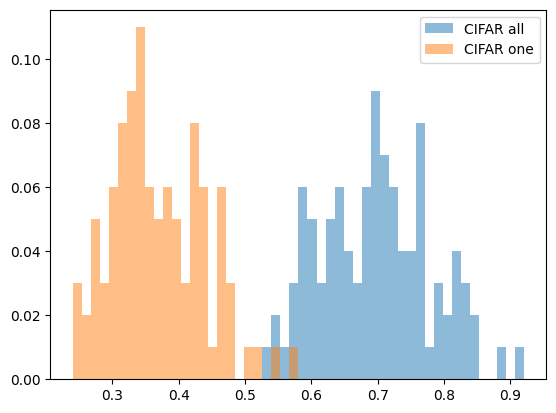

In [8]:
# plot the results (difference of differneces)
test1 = np.array(test1)
test2 = np.array(test2)
dist1, dist2, all_bins, one_bins = samples_to_pdf(
    test2, test1, num_bins=50)
plot_hist(dist1, all_bins, name=run1['name'])
plot_hist(dist2, one_bins, name=run2['name'])
plt.legend()
plt.show()